In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display

In [2]:
data = pd.read_csv('data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
len(data)

7043

In [4]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges contains numbers(float), but it is recognized as object

In [6]:
data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [8]:
data.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [10]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [11]:
data.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [12]:
data.churn = (data.churn == 'yes').astype(int)

In [13]:
data.churn.head(8)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
Name: churn, dtype: int32

In [14]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [15]:
data.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [16]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
data.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [18]:
data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


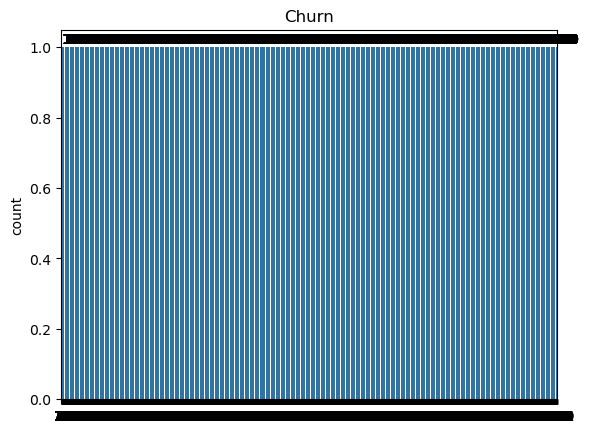

In [19]:
ax=sns.countplot(data['churn'])
# Set label for x-axis


# Set Value for every count
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Set title for plot
ax.set_title(  "Churn")
# Display figure
plt.show()

churn
0    5174
1    1869
Name: count, dtype: int64


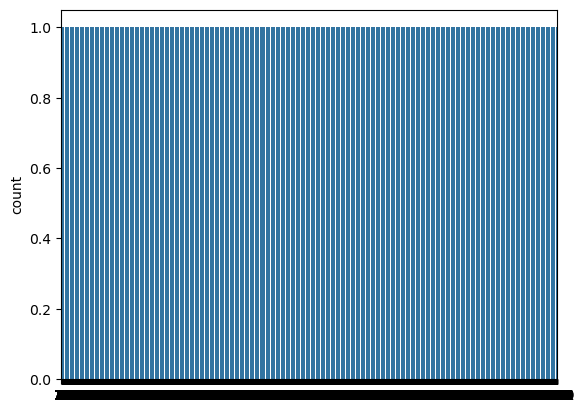

In [20]:
w = data["churn"]

sns.countplot(w)


churn_temp = data.churn.value_counts()

print(churn_temp)


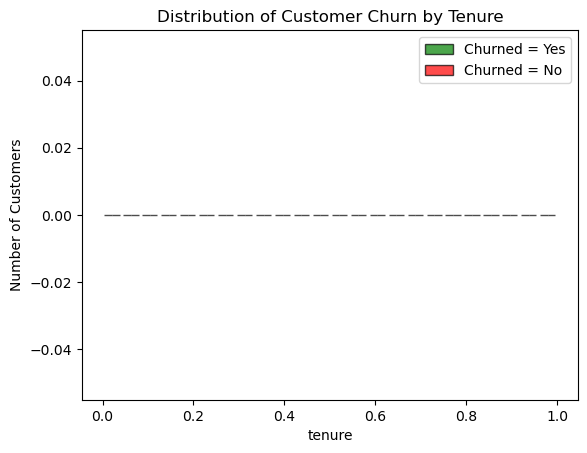

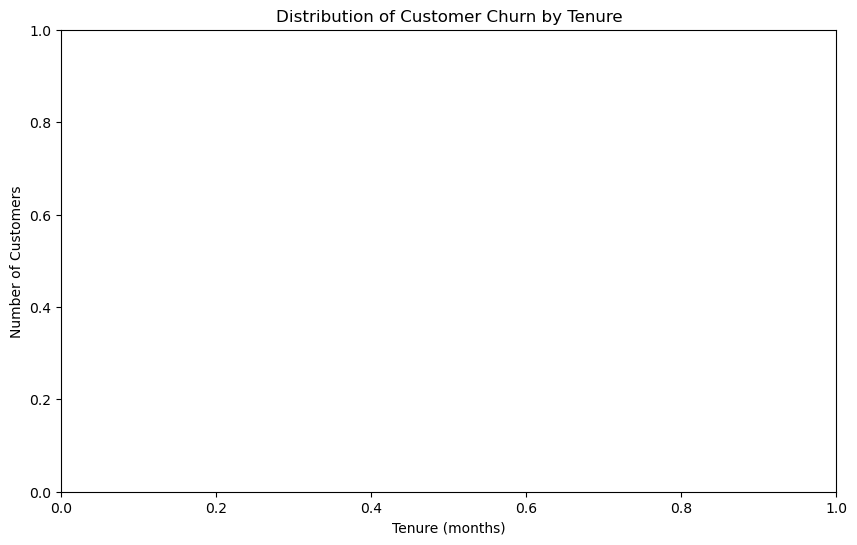

In [45]:
# Using the tenure field, let's see how many of the Loyal customers (people with long tenures) are leaving.

Not_churned = data[data['churn'] == 'no'].tenure
Churned = data[data['churn'] == 'yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn by Tenure')
plt.hist(
    [Churned, Not_churned], 
    color=['g', 'r'], 
    label=['Churned = Yes', 'Churned = No'],
    bins=24,
    edgecolor='black',
    alpha=0.7
    )
plt.legend();

plt.figure(figsize=(10, 6))
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn by Tenure')

plt.show()


In [46]:
#print(categorical_df.columns)


In [47]:
#categorical_df = categorical_df.merge(data[['churn']], left_index=True, right_index=True)


In [48]:
#print(data.columns)

In [34]:
print(categorical_df.columns)

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')


In [41]:
print(categorical_df.columns)


Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')


In [40]:
categorical_df['churn'] = data['churn']


C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\3858469429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['churn'] = data['churn']


Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')


C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\1695024421.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\1695024421.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\1695024421.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\1695024421.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users

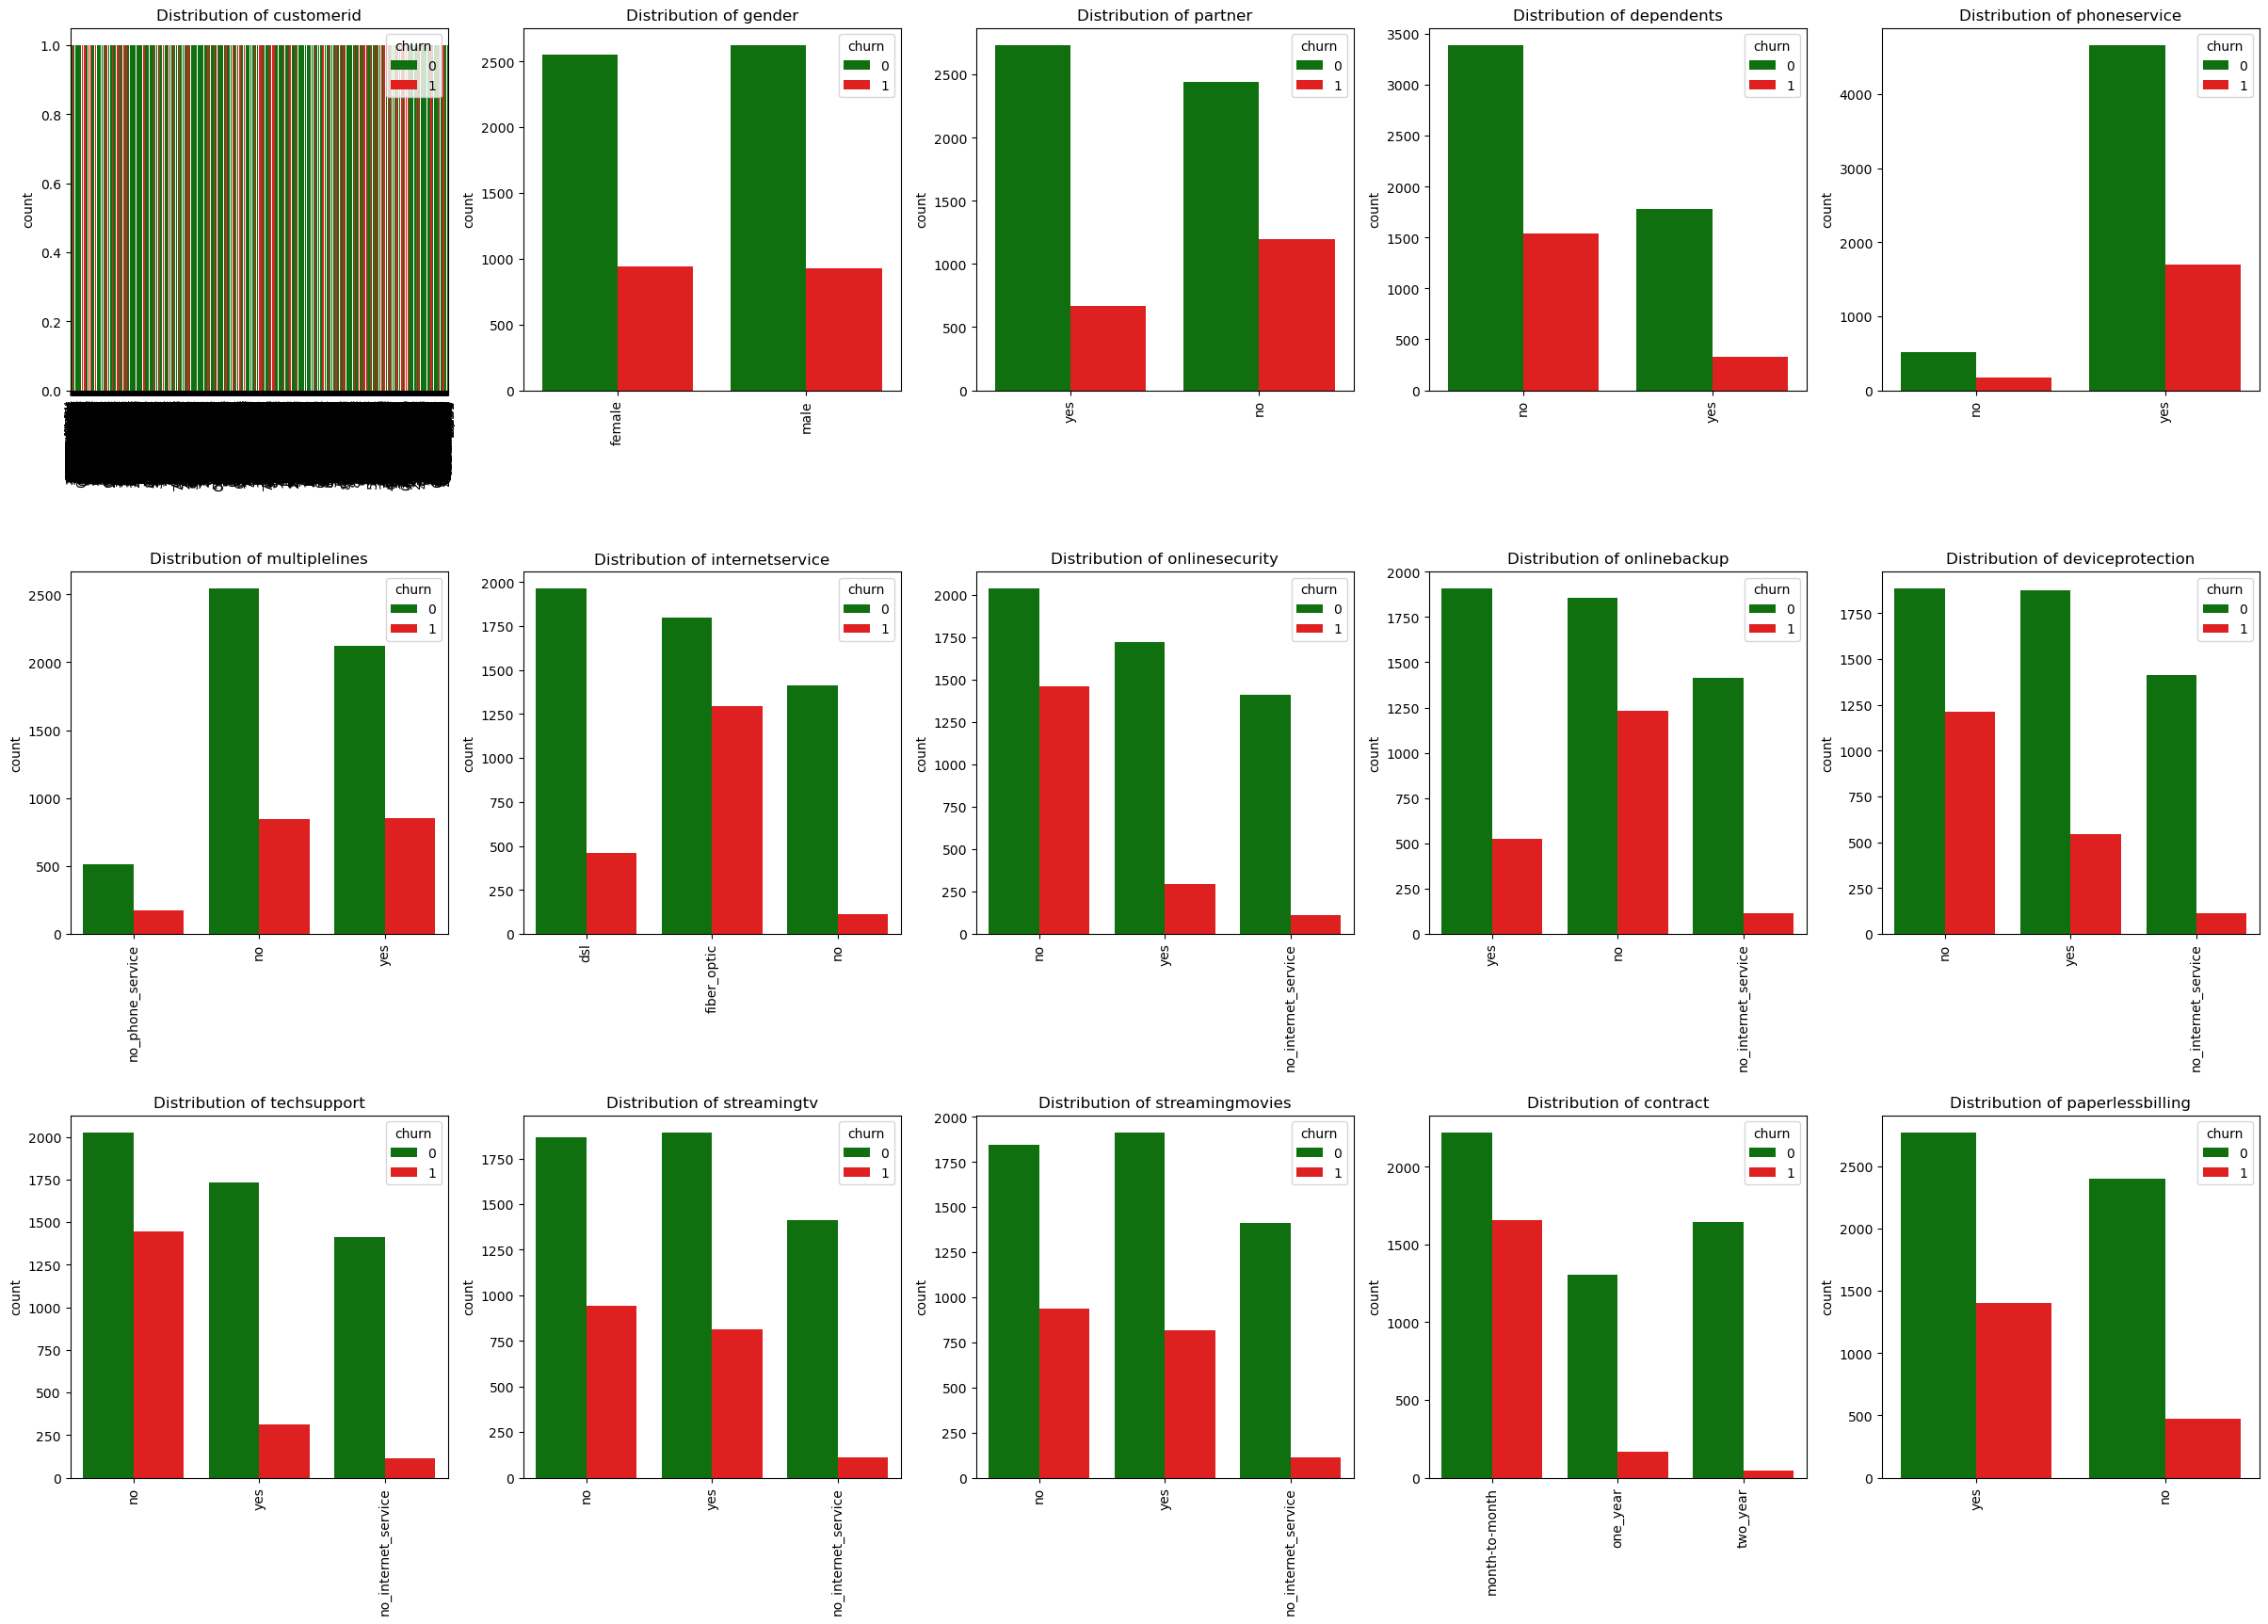

In [43]:
#categorical_features = data.select_dtypes(include=['object']).columns
#categorical_df = data[categorical_features]

# Check if 'churn' column exists
print(categorical_df.columns)

# If necessary, add 'churn' column to categorical_df
if 'churn' not in categorical_df.columns:
    categorical_df['churn'] = data['churn']  # Ensure 'churn' is present

# Now generate the plots
fig, axes = plt.subplots(
    nrows=3, 
    ncols=5, 
    figsize=(30, 20)
)
fig.subplots_adjust(hspace=0.5)

# Assuming 'churn' contains 0 and 1
colors = {1: 'red', 0: 'green'}

for ax, column in zip(axes.flatten(), categorical_df.columns):
    sns.countplot(x=column, data=categorical_df, ax=ax, hue='churn', palette=colors)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


    


<Axes: xlabel='churn'>

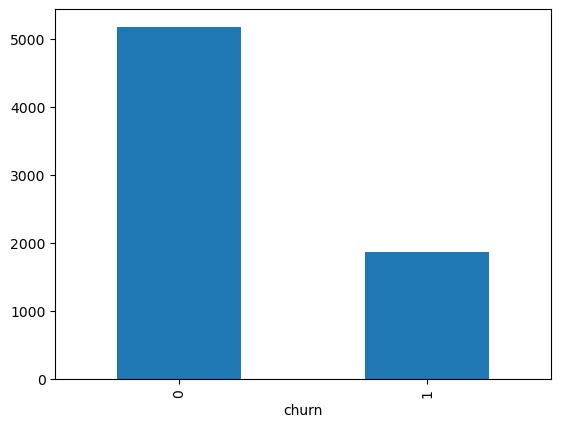

In [26]:
# First, there is a huge imbalance in target.

data['churn'].value_counts().plot(kind = 'bar')

C:\Users\Hp\AppData\Local\Temp\ipykernel_9944\2703001071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(data['churn'])


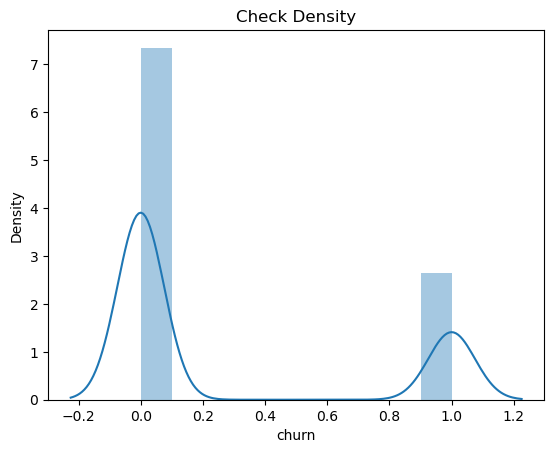

In [49]:
ax=sns.distplot(data['churn'])

ax.set_title("Check Density")
plt.show()

<Axes: >

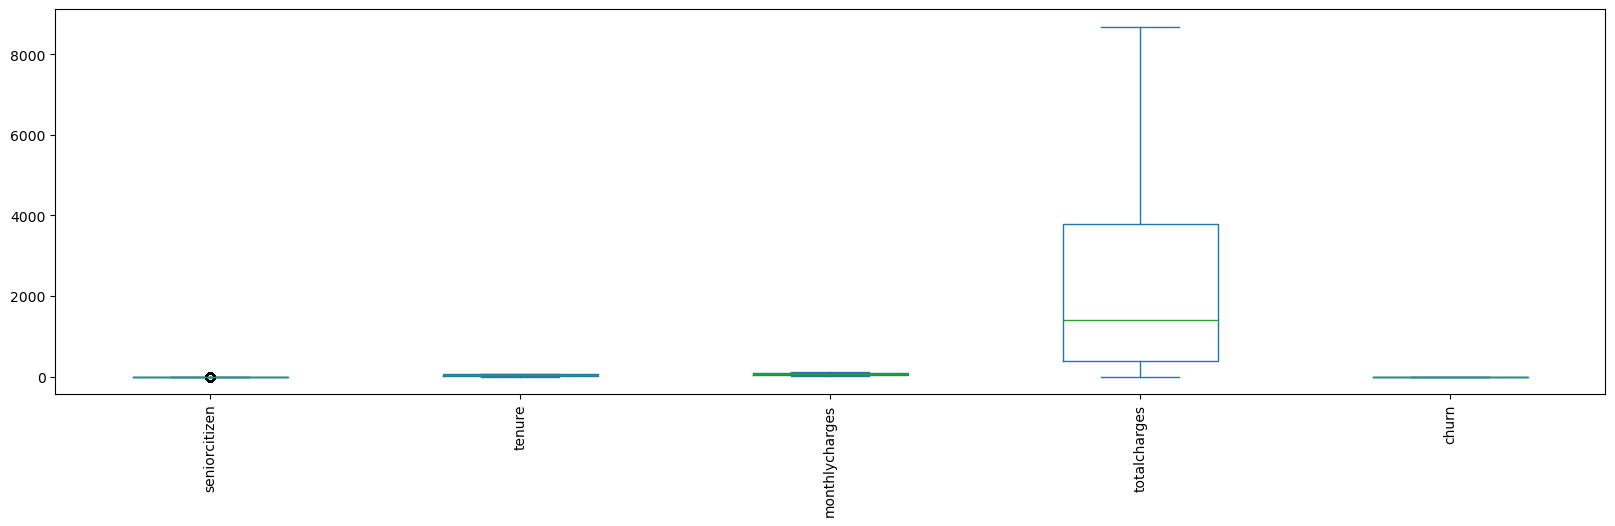

In [50]:
data.plot.box(figsize=(20,5), rot=90)

In [51]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=1)

In [52]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [53]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [54]:
del df_train['churn']
del df_val['churn']

In [55]:
total_mean = df_train_full.churn.mean()
round(total_mean, 3)

0.27

In [56]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [57]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [58]:
data[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,female,0,yes,no,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check
1,male,0,no,no,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check
2,male,0,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check
3,male,0,no,no,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic)
4,female,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check
7039,female,0,yes,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic)
7040,female,0,yes,yes,no,no_phone_service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check
7041,male,1,yes,no,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check


In [59]:
data[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [60]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [61]:
female_mean / total_mean

1.0253955354648652

In [62]:
male_mean / total_mean

0.9749802969838747

In [63]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [64]:
partner_yes / total_mean

0.7594724924338315

In [65]:
partner_no / total_mean

1.2216593879412643

In [66]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - total_mean
df_group['risk'] = df_group['mean'] / total_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [67]:
total_mean = df_train_full.churn.mean()
total_mean

0.26996805111821087

In [68]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - total_mean
    df_group['risk'] = df_group['mean'] /   total_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [69]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MIS')


display(df_mi.head())
display(df_mi.tail())

,MIS
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MIS
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [70]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [71]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [72]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [73]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [74]:
X_train = dv.transform(train_dict)

X_train.shape

(3774, 45)

In [75]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Modelling

In [76]:
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score



In [77]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [78]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(X_train, X_val, y_train, y_val)

 97%|█████████▋| 30/31 [00:23<00:00,  2.04it/s]

[LightGBM] [Info] Number of positive: 1035, number of negative: 2739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 3774, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274245 -> initscore=-0.973191
[LightGBM] [Info] Start training from score -0.973191


100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


In [79]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.71,0.74,0.74,0.73,0.18
LinearDiscriminantAnalysis,0.80,0.74,0.74,0.80,2.53
LogisticRegression,0.80,0.74,0.74,0.80,0.15
NearestCentroid,0.69,0.73,0.73,0.71,0.04
LinearSVC,0.80,0.73,0.73,0.80,0.08
GaussianNB,0.68,0.73,0.73,0.70,0.04
CalibratedClassifierCV,0.80,0.73,0.73,0.80,1.74
RidgeClassifier,0.80,0.72,0.72,0.80,0.34
RidgeClassifierCV,0.80,0.72,0.72,0.80,0.07


### LogisticRegression

In [80]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [81]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [82]:
model.predict_proba(X_val)

array([[0.76508888, 0.23491112],
       [0.73113294, 0.26886706],
       [0.68054732, 0.31945268],
       ...,
       [0.94274682, 0.05725318],
       [0.38476945, 0.61523055],
       [0.93872766, 0.06127234]])

In [83]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred

array([0.23491112, 0.26886706, 0.31945268, ..., 0.05725318, 0.61523055,
       0.06127234])

### Confusion Matrix

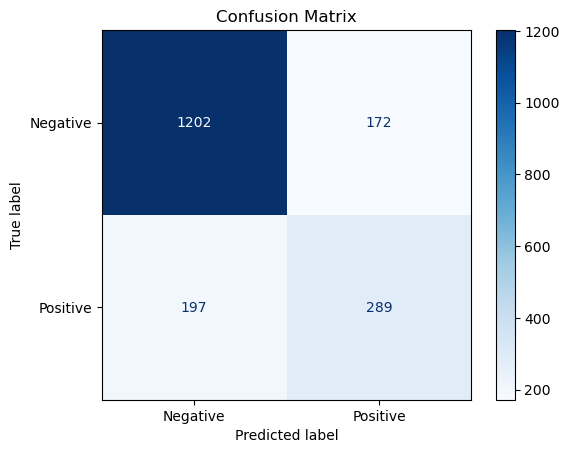

In [88]:
cm = confusion_matrix(y_val, churn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()




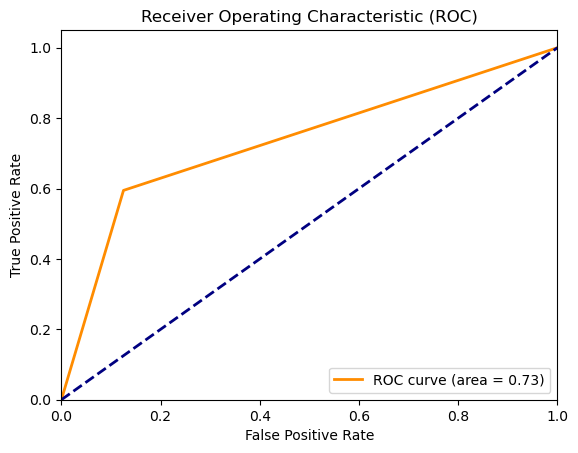

In [89]:
fpr, tpr, _ = roc_curve(y_val, churn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [90]:
score_lr = round(accuracy_score(y_val, churn)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.16 %


In [85]:
churn = y_pred > 0.5

In [86]:
churn = (y_pred >= 0.5).astype(int)

In [87]:
(y_val == churn).mean()

0.8016129032258065

## Model Interpretation

In [91]:
model.intercept_[0]

-0.1219889114139997

In [92]:

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


##

In [93]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [94]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [95]:
model_small.intercept_[0]

-0.5772299114437585

In [96]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

In [97]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [98]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [99]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [100]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332156344105793

In [101]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [102]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [103]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321655911683721

In [104]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [105]:
dv, model = train(df_train, y_train, C=0.001)

In [106]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [107]:

y_pred = predict(df_val, dv, model)

y_pred

array([0.31313805, 0.50284637, 0.21765228, ..., 0.10658525, 0.68749774,
       0.06233219])

In [108]:
C = 1.0
n_splits = 5

In [109]:
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0 0.842 +- 0.007


In [110]:
scores

[0.8444905841071975,
 0.845138475036419,
 0.8333012241621514,
 0.8347529097653003,
 0.8516990367418656]

In [111]:
dv, model = train(df_train_full, df_train_full.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

y_test = df_test.churn.values
auc = roc_auc_score(y_test, y_pred)
auc

0.858359875199064

In [112]:
import pickle

output_file = f'model_C={C}.bin'
output_file

'model_C=1.0.bin'

In [113]:
# Save the trained model
import joblib

joblib.dump(model, 'churn_prediction_with_logistic_reg.joblib')

['churn_prediction_with_logistic_reg.joblib']

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [102]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [104]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)

In [105]:
import pickle
input_file = 'model_C=1.0.bin'
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [106]:
model

LogisticRegression(max_iter=1000)

In [107]:
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
}

In [108]:
X = dv.transform([customer])
y_pred = model.predict_proba(X)[0, 1]

In [109]:
print('input:', customer)
print('output:', y_pred)

input: {'gender': 'female', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'no', 'multiplelines': 'no_phone_service', 'internetservice': 'dsl', 'onlinesecurity': 'no', 'onlinebackup': 'yes', 'deviceprotection': 'no', 'techsupport': 'no', 'streamingtv': 'no', 'streamingmovies': 'no', 'contract': 'month-to-month', 'paperlessbilling': 'yes', 'paymentmethod': 'electronic_check', 'tenure': 1, 'monthlycharges': 29.85, 'totalcharges': 29.85}
output: 0.6286411785777591


In [110]:
import requests

url = 'http://localhost:9696/predict'

In [111]:
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'two_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
}

In [112]:
response = requests.post(url, json=customer).json()
response

ConnectionError: HTTPConnectionPool(host='localhost', port=9696): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002625DB62690>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
if response['churn']:
    print('sending email to', 'asdx-123d')

In [77]:
sv = svm.SVC(kernel='linear', random_state=1, probability=True)
sv.fit(X_train, y_train)






SVC(kernel='linear', probability=True, random_state=1)

In [78]:
#sv.predict(X_val)



sv.predict_proba(X_val)

array([[0.65805501, 0.34194499],
       [0.73550131, 0.26449869],
       [0.8445165 , 0.1554835 ],
       ...,
       [0.74936819, 0.25063181],
       [0.44049436, 0.55950564],
       [0.81435564, 0.18564436]])

In [80]:
y_pred1 = sv.predict_proba(X_val)

y_pred1

array([[0.65805501, 0.34194499],
       [0.73550131, 0.26449869],
       [0.8445165 , 0.1554835 ],
       ...,
       [0.74936819, 0.25063181],
       [0.44049436, 0.55950564],
       [0.81435564, 0.18564436]])

In [82]:
svm = (y_pred1 >= 0.5).astype(int)

In [83]:
cm = confusion_matrix(y_val, svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [84]:
cm = confusion_matrix(y_val, svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets